# Solutions to <span style='color:red'>Problem Set 1: Python Basics</span>

## Instructions:

- Enter the answers directly on this notebook
  - In most cases, you just need to execute the code and leave the output as it is
- All of the code needed here can be found in Topic1_PythonBasics 
- In some cases, I ask you to explain something. In the cases, there is an extra markup cell (**ANSWER:**) that you can fill out 
- When you are done, select "Print..." from the File-menu and create a PDF of the notebook
  - Submit this notebook through canvas
  - You can also submit the notebook as an .html file -- but please don't submit it as a notebook (.ipynb) file

## Problem 1

### a. Assign string "Quantitative" to variable **S** and use the print statement to print this string

In [1]:
S = 'Quantitative'
print(S)

Quantitative


### b. Assign string " Finance" to variable **T**. In Python, you can join strings using the + symbol. Let's try this out. After creating these two variables, print S + T

In [2]:
T = " Finance"
print(S + T)

Quantitative Finance


### c. "Slicing" in Python refers to accessing continuous range of elements. It is very useful in handling data, e.g., when you want to have all data from some start date to some end date. We can also slice strings: each character is its own element

The syntax for slicing is *var*[start:stop], where 'start' indicates the first element we include and 'stop' indicates the element *before* which we stop

Below, slice variable **S** using the following start and stop values:

- start = 1, stop = 5. (That is, write and execute S[1:5])
- start = 0, stop = 5

Based on these, what is the index of the first element, that is, letter 'Q' in our case?

In [5]:
print('Start = 1, stop = 5:', S[1:5])
print('Start = 0, stop = 5:', S[0:5])

Start = 1, stop = 5: uant
Start = 0, stop = 5: Quant


**Answer:** Indexing in Python starts at 0. There index 0 in S has letter 'Q'

## Problem 2

- Create a list that contains values 1, 1, 2, 3, 5, 8, and 13
- Loop through this list, and 
- Print each value

In [6]:
L = [1, 1, 2, 3, 5, 8, 13]

for element in L:
    print(element)

1
1
2
3
5
8
13


## Problem 3

### a. Create a dictionary called **D** that contains names and scores for four students: Andy, Brett, Cindy, and Dave (make up the scores)

Write and execute D['Brett'] to display the Brett's score 

In [8]:
# Create the dictionary 

D = {'Andy': 27,
    'Brett': 31,
    'Cindy': 38,
    'Dave': 16}

D['Brett']

31

### b. Write and execute D['Erica']. What happens?

In [9]:
D['Erica']

KeyError: 'Erica'

**Answer:** Our dictionary doesn't have a key for student 'Erica' and so we get a KeyError

### c. Write and execute D.get('Erica') and D.get('Erica', 0)

Why would this 'get' statement be useful when you write code and use dictionaries?

In [13]:
D.get('Erica')

In [11]:
D.get('Erica', 0)

0

**Answer:** We can use the .get() method to try to retrieve values from dictionary when we don't check whether or not a key exists. By default, it returns 'None' if the key doesn't exist in the dictionary. With the second argument (here, 0), it returns this second argument as the default value when the key doesn't exist.

## Problem 4

### a. The following code downloads some data from Yahoo finance. 

Modify and then execute this code so that it downloads data for IBM, General Electric, and Gamestop instead

- You need to look up these companies' tickers symbols

In [14]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Create a list that contains the tickers we want to retrieve
ticker_symbols = ['IBM', 'GE', 'GME']

# Define the start and end dates for the data
start_date = datetime(2019,1,1)
end_date = datetime.today()    

stock_data = yf.download(ticker_symbols, start=start_date, end=end_date)
    
stock_returns = 100 * stock_data.xs('Adj Close', axis=1, level=0).pct_change()

display(stock_returns.tail(5))

[*********************100%***********************]  3 of 3 completed


,GE,GME,IBM
Date,,,
2024-02-05,0.856902,-8.621857,-1.275625
2024-02-06,-0.094405,4.754832,-0.005448
2024-02-07,0.668701,-0.212771,0.179921
2024-02-08,0.397114,1.990055,1.252196
2024-02-09,0.165405,2.160275,1.073983


### b. Run the code below to get "summary statistics" for daily returns

These daily returns are expressed in percentages, e.g., a value of 0.14 for the mean would indicate that the average return is 0.14% per day

- Which stock had the highest mean return over this sample period?

- Which stock had the highest one-day return over this sample period? How high was this return?

In [15]:
stock_returns.describe()

,GE,GME,IBM
count,1285.000000,1285.000000,1285.000000
mean,0.116968,0.479722,0.074489
std,2.573061,9.187759,1.662105
min,-15.159238,-60.000000,-12.850736
25%,-1.178091,-2.886103,-0.650228
50%,0.047767,-0.255796,0.103051
75%,1.298707,2.576811,0.813010
max,14.729923,134.835802,11.301058


**Answers:**

a) GME had the highest mean return over this sample period: 0.48%. (NOTE: Your precise answers will depend on when you executed the code!)

b) GME had also the highest one-day return of 134.8%! This return occurred during the Meme Stock Craze. Here is a plot of (adjusted) Gamestop stock prices during that episode:

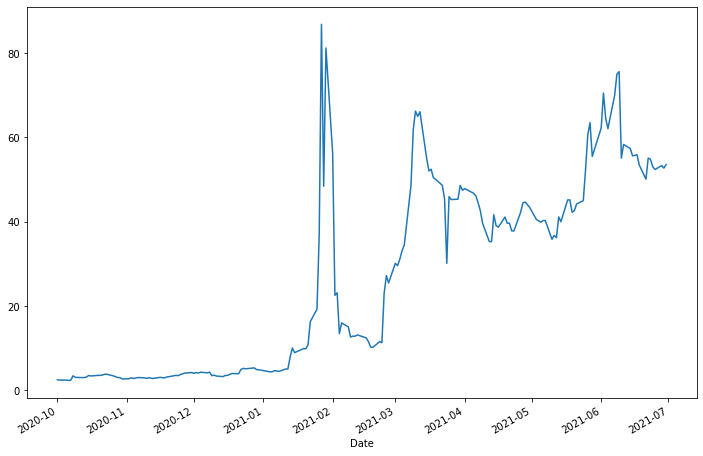

In [24]:
stock_data.xs('Adj Close', axis=1, level=0)['GME'].loc['2020-10':'2021-06'].plot(figsize=(12,8));

### c. The code below computes monthly stock returns and prints summary statistics for these returns

Which stock was the most volatile, that is, which stock has the highest 'std'?

In [25]:
monthly_stock_returns = 100 * ((1 + stock_data.xs('Adj Close', axis=1, level=0).pct_change()).resample('M').prod() - 1)
monthly_stock_returns.describe()

,GE,GME,IBM
count,62.000000,62.000000,62.000000
mean,2.400111,27.619485,1.495017
std,11.556962,207.968845,6.909291
min,-26.949581,-68.695385,-14.767577
25%,-3.120300,-15.557655,-3.504208
50%,1.793837,-2.366920,1.688477
75%,7.937120,13.633259,6.249003
max,37.196769,1625.053065,16.673893


**Answer:** GME also had the highest volatility during the sample period because of the Meme stock episode 

### d. Execute the code below to plot the cumulative returns for the three stocks over the sample period

The 'figsize' argument controls the shape of the plot. With a tuple (8, 10), the plot is 8 inches wide and 10 inches high. Change this argument so that the plot looks nice.

Note: 
- The command below does 'method chaining' -- the line first computes the cumulative sum of returns and the plots the result
- We *could* do this in two steps
- But we often do method chaining in Python if we don't really need to save the intermediate results

<AxesSubplot:xlabel='Date'>

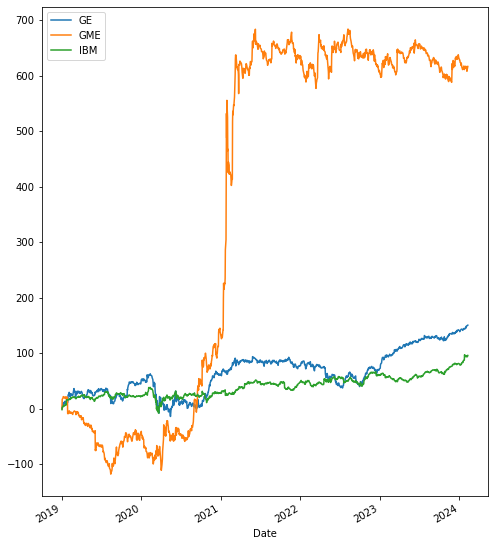

In [26]:
stock_returns.cumsum().plot(figsize=(8,10))

### e. The command below computes return correlations between the three stocks. The results are displayed in a symmetric 3x3 table 

Correlations are important in that they tell us how closely different stocks track each other

- A number of 1.0 would indicate that the two stocks always move in perfect proportion to each other
- A number of -1.0 would indicate that the two stocks always move in *opposite directions* in perfect proportion
- A number of 0 would indicates that the two stocks are uncorrelated (think "unrelated")

Which two stocks display the highest correlation?

Which two stocks display the lowest correlation?

In [27]:
stock_returns.corr().round(2)

,GE,GME,IBM
GE,1.00,0.17,0.50
GME,0.17,1.00,0.16
IBM,0.50,0.16,1.00


**Answer:** 

- IBM and General Electric have the highest correlation (0.50)
- Of the three pairs, the correlation between GME and IBM is the lowest (0.16)